<a href="https://colab.research.google.com/github/sachinprabhu007/ML-Expriments/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the dependencies 

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
#define the parameters

learning_parameter = 0.01
epochs = 300


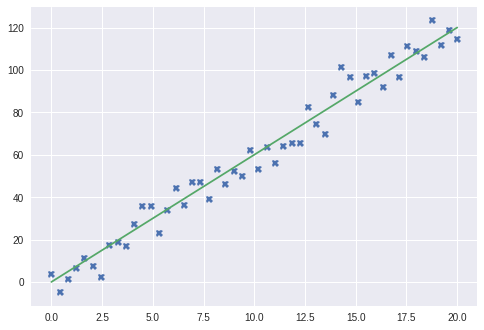

In [7]:
#creating the dataset of linear regression

# Here line is y = Ax  , samples = sample points

samples = 50

x_train = np.linspace(0,20,samples)
y_train = 6 * x_train + 7 * np.random.randn(samples)

#noisy dataset
plt.plot(x_train, y_train,'X')

#noise free dataset
plt.plot(x_train, 6*x_train)

plt.show()

In [0]:
#Define the tensorflow definitions

Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

#Create the model for regression

prediction = W * X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*samples)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize the variables
init = tf.global_variables_initializer()

Epochs 0.000000 Cost 9.734241 Weight 4.075478 Bias 1.890751
Epochs 40.000000 Cost 0.236914 Weight 5.889933 Bias 1.668787
Epochs 80.000000 Cost 0.247008 Weight 5.911980 Bias 1.330455
Epochs 120.000000 Cost 0.256309 Weight 5.931891 Bias 1.024924
Epochs 160.000000 Cost 0.264855 Weight 5.949872 Bias 0.749014
Epochs 200.000000 Cost 0.272690 Weight 5.966109 Bias 0.499852
Epochs 240.000000 Cost 0.279866 Weight 5.980772 Bias 0.274847
Epochs 280.000000 Cost 0.286426 Weight 5.994014 Bias 0.071656


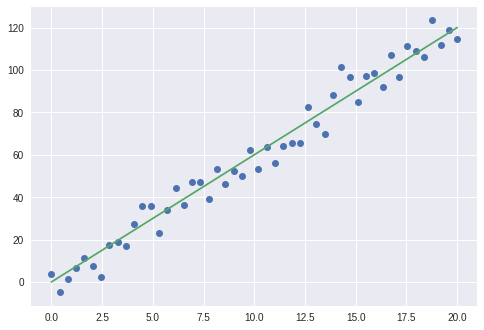

In [12]:
#Define the tensorflow  session

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y })
    if not epoch % 40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x , Y:y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1,B1))
      
  Weight = sess.run(W)
  Bias  = sess.run(B)
  
  plt.plot(x_train, y_train,'o')
  plt.plot(x_train, Weight * x_train + Bias)
  plt.show()